<a href="https://colab.research.google.com/github/Saurav-Somani/Soft_Computing/blob/main/SNA_Round_2_ICM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random 
import numpy as np

**Creating scale free network**

In [18]:
import networkx as nx
import matplotlib.pyplot as plt
import random

N = 10000

G = nx.scale_free_graph(N)

Total_sum_steps = []
Total_sum_nodes = []


def getProbabilityMatrix():
    probability_matrix = [ [ 0 for i in range(N) ] for j in range(N) ]
    for node in G.nodes():
        outedges = G.out_edges(node)
        neighbor = {}
        sum = 0
        for j in outedges:
            if (j[0] != j[1] and probability_matrix[node][j[1]] == 0):
                x = random.random()
                sum = sum + x
                neighbor[j[1]] = x
                probability_matrix[node][j[1]] = -1
        for key in neighbor:
            probability_matrix[node][key] = float(neighbor[key]/sum)
    return probability_matrix

def getRandomSeedSet(k):
    seed_set = list()
    for i in range(k):
        seed_set.append(random.randint(0,N-1))
    return seed_set

def ICM_util(seed_set, probability_matrix):
    cnt1=0
    cnt2=0
    queue = []
    res = []
    for i in seed_set:
        queue.append(i)
        res.append(i)
    t = 0
    while queue:
        new_q = []
        while queue:
            x = queue.pop(0)
            for j in G.out_edges(x):
                visited = list()
                if (j[0] != j[1] and not j[1] in visited and not j[1] in res and not j[1] in new_q):
                    visited.append(j[1])
                    p = random.random()
                    if p <= probability_matrix[x][j[1]]:
                        new_q.append(j[1])
        if not new_q:
            break
        queue = new_q
        t = t + 1
        for e in new_q:
            res.append(e)
    print("Activated Nodes - " + str(res))
    print("Number of Steps - " + str(t))
    print("Number of activated Nodes - ",len(res))

   
    Total_sum_nodes.append(len(res))
    Total_sum_steps.append(t)

    return t


def ICM(seq):
    seed_set = getRandomSeedSet(random.randint(5,1000))
    probability_matrix = getProbabilityMatrix()
    print("Seed Set " + str(seq+1) + " - " + str(seed_set))
    max_steps = ICM_util(seed_set, probability_matrix)

for i in range(10):
    
    ICM(i)
    print("\n")

Seed Set 1 - [3966, 4505, 5337, 4582, 6496, 6957, 9450, 9707, 1616, 855, 225, 918, 4841, 728, 4136, 9726, 6471, 9873, 3296, 483, 8043, 2534, 8902, 6281, 4273, 4662, 5133, 5172, 2619, 4463, 394, 7804, 2036, 8956, 4028, 5970, 7444, 6246, 3300, 4706, 8364, 1256, 4419, 425, 9836, 5227, 5892, 4388, 724, 713, 3411, 5659, 4642, 7066, 3216, 5504, 5329, 9817, 38, 2814, 7550, 7486, 9896, 1500, 1067, 9756, 4834, 7576, 7368, 2283, 7065, 7831, 7180, 569, 4285, 3401, 4346, 3553, 6774, 9242, 4329, 3932, 4518, 2562, 5116, 4665, 1417, 5733, 6325, 1898, 9266, 7539, 5831, 2782, 9793, 9935, 8360, 605, 4862, 2329, 473, 3418, 9667, 489, 5197, 2741, 7304, 4586, 1982, 1069, 7382, 540, 2257, 2836, 4887, 2365, 774, 1771, 5771, 9970, 1930, 8722, 9470, 6651, 9823]
Activated Nodes - [3966, 4505, 5337, 4582, 6496, 6957, 9450, 9707, 1616, 855, 225, 918, 4841, 728, 4136, 9726, 6471, 9873, 3296, 483, 8043, 2534, 8902, 6281, 4273, 4662, 5133, 5172, 2619, 4463, 394, 7804, 2036, 8956, 4028, 5970, 7444, 6246, 3300, 4706, 

In [19]:
print("The average number of steps for ICM is", sum(Total_sum_steps)/10)
print("The average number of nodes activated in ICM is", sum(Total_sum_nodes)/10)

The average number of steps for ICM is 3.4
The average number of nodes activated in ICM is 843.2


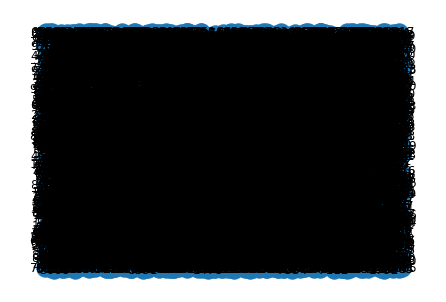

In [ ]:
nx.draw_random(G, with_labels = True)
plt.savefig("fig1.png")